#BANK CUSTOMER CHURN MODEL PROJECT

OBJECTIVE:Develop a customer churn prediction system for a bank using machine learning to identify customers who are likely to leave the bank in the near future. The objective is to reduce customer churn by proactively taking actions to retain at-risk customers and improve customer satisfaction.



DATA SOURCE:
Customer Data: Gather comprehensive customer information, including demographics (age, gender, marital status, etc.), account details (account type, balance, tenure, etc.), and transaction history. This data can be obtained from the bank's internal database.

Churn Labels: Create a dataset that contains labels indicating whether each customer has churned or not. This information can be obtained from historical records of customers who have closed their accounts or stopped using the bank's services.

Customer Interactions: Collect data on customer interactions with the bank, such as customer service inquiries, complaints, and feedback. This can provide insights into customer satisfaction and potential issues leading to churn.

Credit Score Data: Incorporate credit score information for customers if available. A low credit score can be an indicator of financial instability, which may correlate with churn.

Market Data: Include economic and market-related data that could impact a customer's decision to churn, such as interest rates, inflation rates, and unemployment rates.

Customer Surveys: Conduct customer surveys to gather additional insights into customer satisfaction, reasons for considering churn, and feedback on the bank's services.

External Data: Depending on the bank's location and services, external data sources such as social media sentiment analysis or industry-specific trends can be used to enrich the dataset.

#IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')

#EXPLORATORY DATA ANALYSIS

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.shape

(10000, 13)

In [6]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [9]:
df.duplicated('CustomerId').sum()

0

In [10]:
df = df.set_index('CustomerId')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB



`
#ENCODING

In [13]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
df.replace({'Geography': {'France':2, 'Germany':1, 'Spain':0}}, inplace=True)

In [15]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [16]:
df.replace({'Gender': {'Male': 0, 'Female':1}}, inplace=True)

In [19]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [20]:
df.replace({'Num Of Products': {1: 0, 2:1, 3:1, 4:1}}, inplace=True)

In [21]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [22]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [24]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [25]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

<Axes: >

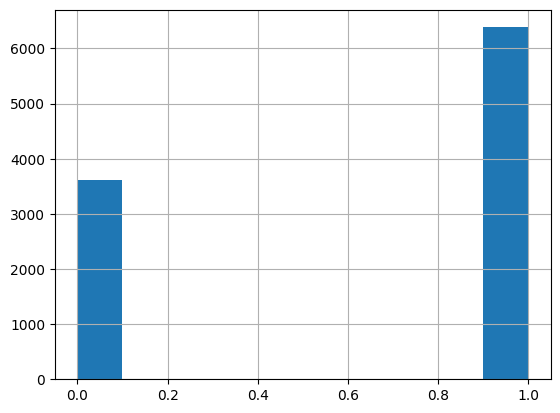

In [30]:
df['Zero Balance'] .hist()

In [31]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

#DEFINE LABEL AND FEATURES

In [32]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [33]:
X = df.drop(['Surname','Churn'], axis = 1)

In [34]:
y = df['Churn']

In [35]:
X.shape, y.shape

((10000, 11), (10000,))

#HANDLING IMBALANCE DATA

Handling imbalanced data is a common challenge in machine learning, especially when dealing with binary classification problems where one class significantly outnumbers the other. Imbalanced data can lead to biased models that perform poorly on the minority class. Here are several strategies to address this issue:
1.fraud detection
2.spam filtering
3.disease screening
4.online sales churn
5.advertising click-throughts

Resampling Techniques:

Oversampling: Increase the number of instances in the minority class by duplicating existing samples or generating synthetic data points. Techniques like Random Oversampling or SMOTE (Synthetic Minority Over-sampling Technique) can be effective.

Undersampling: Decrease the number of instances in the majority class by randomly removing some of them. Care should be taken not to remove too much data, which can lead to information loss. Techniques like Random Undersampling or Tomek links can be used.

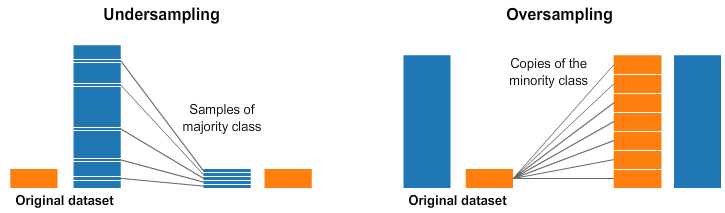

In [36]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

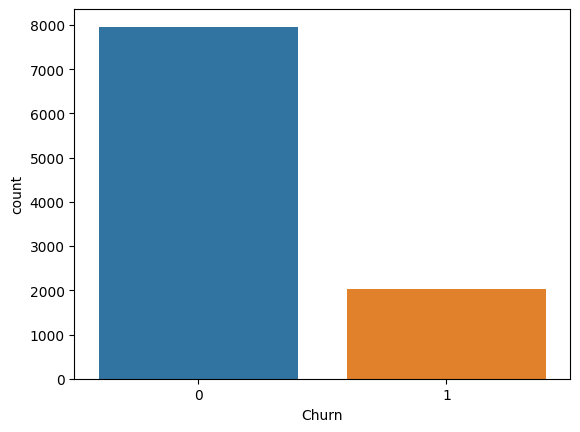

In [37]:
sns.countplot(x ='Churn', data = df);

In [38]:
X.shape, y.shape

((10000, 11), (10000,))

#RANDOM UNDER SAMPLING

In [39]:
from imblearn.under_sampling import RandomUnderSampler

In [40]:
rus = RandomUnderSampler(random_state=2529)

In [41]:
X_rus, y_rus = rus.fit_resample(X,y)

In [42]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [43]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [44]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

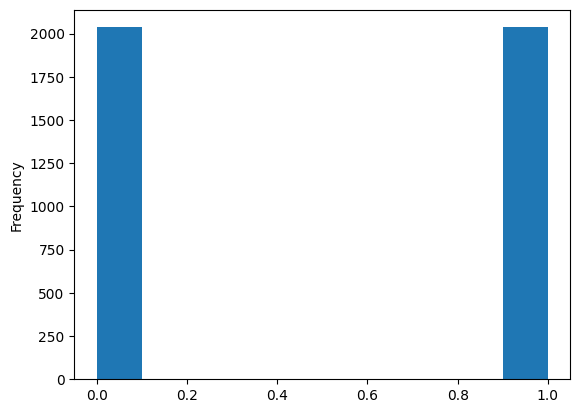

In [46]:
y_rus.plot(kind = 'hist')

#RANDOM OVER SAMPLING

In [48]:
from imblearn.over_sampling import RandomOverSampler

In [49]:
ros = RandomOverSampler(random_state=2529)

In [50]:
X_ros, y_ros = ros.fit_resample(X,y)

In [51]:
X_ros.shape, y_ros.shape, X.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [52]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [53]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

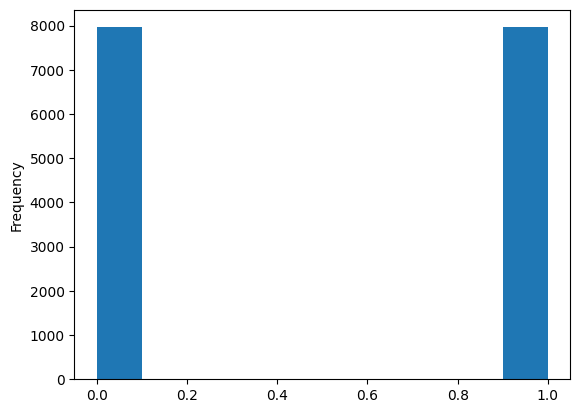

In [54]:
y_ros.plot(kind = 'hist')

#Train Test Split

In [55]:
from sklearn.model_selection import train_test_split

#Split Original Data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=25)

#Split Random Under Sample Data

In [71]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus,y_rus,test_size=0.3, random_state=25)

#Split Random Over Sample Data

In [70]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros,y_ros,test_size=0.3, random_state=25)

#Standardize Features

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
sc = StandardScaler()

#Standardize Original Data

In [62]:
X_train[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

In [63]:
X_test[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

#Standardize Random Under Sample Data

In [64]:
X_train_rus[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

In [73]:
X_test_rus[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

#Standardize Random over Sample Data

In [65]:
X_train_ros[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

In [72]:
X_test_ros[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

#Support Vector Machine Classifier

In [81]:
from sklearn.svm import SVC

In [82]:
svc = SVC()

In [83]:
svc.fit(X_train,y_train)

SVC()

In [84]:
y_pred =svc.predict(X_test)

#Model Accuracy

In [75]:
from sklearn.metrics import  confusion_matrix,  classification_report

In [85]:
confusion_matrix(y_test, y_pred)

array([[2374,   45],
       [ 421,  160]])

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2419
           1       0.78      0.28      0.41       581

    accuracy                           0.84      3000
   macro avg       0.81      0.63      0.66      3000
weighted avg       0.84      0.84      0.81      3000



#Hyperparameter tunning

In [88]:
from sklearn.model_selection import GridSearchCV

In [127]:
param_grid = {'C': [0.1,1, 10],
              'gamma': [1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight' : ['balanced']

              }

In [128]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [129]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [130]:
grid_predictions = grid.predict(X_test)

In [131]:
confusion_matrix(y_test,grid_predictions)

array([[2166,  253],
       [ 365,  216]])

In [132]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2419
           1       0.46      0.37      0.41       581

    accuracy                           0.79      3000
   macro avg       0.66      0.63      0.64      3000
weighted avg       0.78      0.79      0.79      3000



#Model with Random Under Sampling

In [96]:
svc_rus = SVC()

In [97]:
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [98]:
y_pred_rus = svc_rus.predict(X_test_rus)

#Model Accuracy

In [99]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[603,   0],
       [620,   0]])

In [133]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       603
           1       0.00      0.00      0.00       620

    accuracy                           0.49      1223
   macro avg       0.25      0.50      0.33      1223
weighted avg       0.24      0.49      0.33      1223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Hyperparameter Tunning

In [119]:
param_grid = {'C': [0.1,1, 10],
              'gamma': [1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight' : ['balanced']

              }

In [120]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [122]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [123]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [124]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[603,   0],
       [620,   0]])

In [121]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       603
           1       0.00      0.00      0.00       620

    accuracy                           0.49      1223
   macro avg       0.25      0.50      0.33      1223
weighted avg       0.24      0.49      0.33      1223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#model with Random Over Sampling

In [108]:
svc_ros = SVC()

In [109]:
svc_ros.fit(X_train_ros, y_train_ros)

SVC()

In [110]:
y_pred_ros = svc_ros.predict(X_test_ros)

#Model Accuracy

In [111]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[2426,    0],
       [2352,    0]])

In [112]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67      2426
           1       0.00      0.00      0.00      2352

    accuracy                           0.51      4778
   macro avg       0.25      0.50      0.34      4778
weighted avg       0.26      0.51      0.34      4778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Hyperparameter Tunning

In [125]:
param_grid = {'C': [0.1,1, 10],
              'gamma': [1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight' : ['balanced']

              }

In [126]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [115]:
print(grid_ros.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [116]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [117]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2426,    0],
       [2352,    0]])

In [118]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67      2426
           1       0.00      0.00      0.00      2352

    accuracy                           0.51      4778
   macro avg       0.25      0.50      0.34      4778
weighted avg       0.26      0.51      0.34      4778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
